# Python Basics: Data Analysis & Fitting
**Objective:** In this notebook, you will analyze data from a hypothetical physics experiment (Hooke's Law). You will learn how to store data, visualize it, and fit a model to it. This Notebook will be useful to complete the 2nd part of the Project 1 on the Photoelectric Effect.

### 1. Import Libraries
First, we need to import the libraries we will use.
* `numpy`: For math operations.
* `pandas`: For creating tables (DataFrames).
* `matplotlib.pyplot`: For plotting graphs.
* `scipy.optimize`: For fitting curves to data.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

print("Libraries imported successfully!")

Libraries imported successfully!


### 2.3.1 Plot the data

Import in data from Millikand's paper as two new dictionaries.

In [8]:
##Data for Sodium
data_Na = {
    'frequency': [5.49, 6.91, 7.41, 8.23, 9.61, 11.83],
    'potential': [-2.10, -1.55, -1.33, -.98, -.42, .52]
}

##Data for Lithium
data_Li = {
    'frequency': [5.49, 6.91, 7.41, 8.23, 9.61, 11.83],
    'potential': [-1.61, -1.02, -.82, -.48, .09, 1]
}

Convert to these dictionaries to two new data frames.

In [17]:
dfNa = pd.DataFrame(data_Na)
dfNa

,frequency,potential
0,5.49,-2.10
1,6.91,-1.55
2,7.41,-1.33
3,8.23,-0.98
4,9.61,-0.42
5,11.83,0.52


In [ ]:
dfLi = pd.DataFrame(data_Li)
dfLi

,frequency,potential
0,5.49,-1.61
1,6.91,-1.02
2,7.41,-0.82
3,8.23,-0.48
4,9.61,0.09
5,11.83,1.00


Plotting Stopping Potential for Sodium.

Text(0.5, 1.0, 'Stopping Potential VS Frequency for Sodium Target')

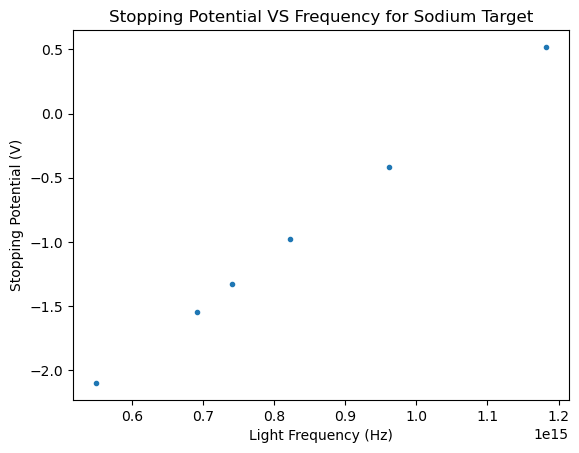

In [ ]:
xNa = dfNa['frequency'] * 10**14
yNa = dfNa['potential']
plt.plot(xNa,yNa, '.')
plt.xlabel("Light Frequency (Hz)")
plt.ylabel("Stopping Potential (V)")
plt.title("Stopping Potential VS Frequency for Sodium Target")

Plotting Stopping Potential for Lithium.

Text(0.5, 1.0, 'Stopping Potential VS Frequency for Lithium Target')

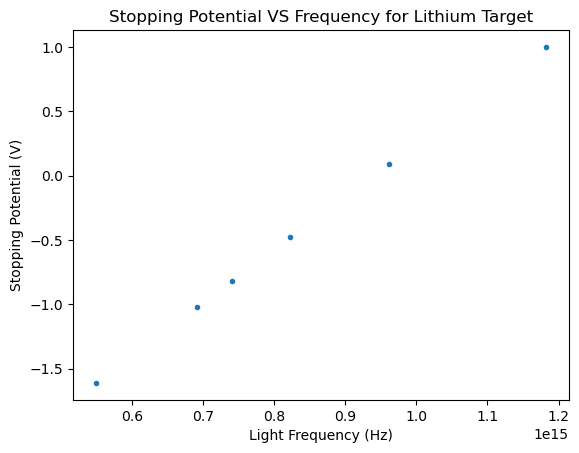

In [28]:
xLi = dfLi['frequency'] * 10**14
yLi = dfLi['potential']
plt.plot(xLi,yLi, '.')
plt.xlabel("Light Frequency (Hz)")
plt.ylabel("Stopping Potential (V)")
plt.title("Stopping Potential VS Frequency for Lithium Target")

### 2.3.2 Linear Fit

Fit the data using a linear regression model.

First let's define some physical constants

In [ ]:
hConstant = 6.62607015 * 10**(-34) ## Planck's Constant
e = 1.60217663 * 10**(-19) ## Elementary Charge

Next we define our model which is going to be based on Einstein's photoelectric relation

In [ ]:
def linear_model(f, h, w): ## Photoelectric Relation. Argument w is the effective work function
    return (h/e) * f - (w / e)

Now we can actually perform the fit calculations. We will start with Sodium:

In [ ]:
pOpt,pCov = curve_fit(linear_model, xNa, yNa) ## Calculate the fit parameters and covariance matrix

hNa, wNa = pOpt ## Extract experimental values for h and the work function

## Calculate errors on h and w
pErr = np.sqrt(np.diag(pCov))
hNa_err, wNa_err = pErr

print(f"Experimental Planck's Constant (hNa): {hNa:.3e} ± {hNa_err:.1e} J/Hz")
print(f"Sodium Work Function (wNa): {wNa:.3e} ± {wNa_err:.1e} C")

Experimental Planck's Constant (hNa): 6.646e-34 ± 5.1e-36 J/Hz
Sodium Work Function (wNa): 7.045e-19 ± 4.3e-21 C


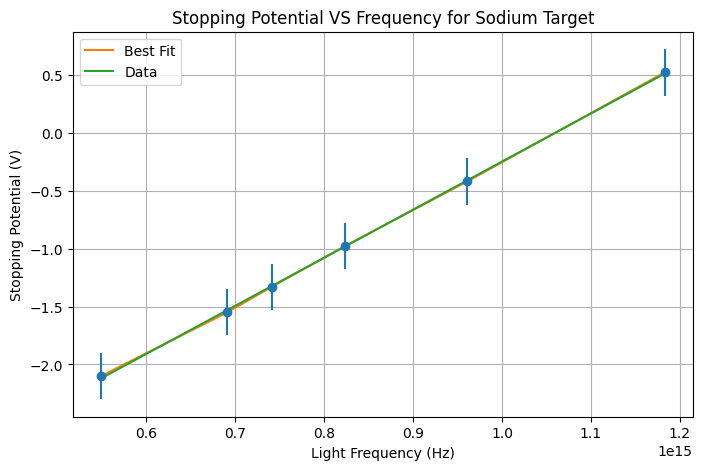

In [ ]:
plt.figure(figsize=(8, 5))

# TODO: Use plt.errorbar() to plot the data with yerr=0.2 and fmt='o' (for dots)
plt.errorbar(xNa,yNa,yerr=0.2,fmt='o')

# TODO: Generate y-values for the line using the optimal parameters (hNa, wNa)
line_y = linear_model(xNa, hNa, wNa)

# TODO: Plot the line_y on top of the scatter plot.
plt.plot(xNa,yNa)
plt.plot(xNa,line_y)
# Challenge: Can you add the error value to the label? (e.g., label=f'Fit: k={k_opt:.2f} ± {k_err:.2f}')


# Formatting
plt.xlabel("Light Frequency (Hz)")
plt.ylabel("Stopping Potential (V)")
plt.title("Stopping Potential VS Frequency for Sodium Target")
plt.legend(['Best Fit', 'Data'])
plt.grid(True)

In [ ]:
pOpt2,pCov2 = curve_fit(linear_model, xLi, yLi) ## Calculate the fit parameters and covariance matrix

hLi, wLi = pOpt2 ## Extract experimental values for h and the work function

## Calculate errors on h and w
pErr2 = np.sqrt(np.diag(pCov2))
hLi_err, wLi_err = pErr2

print(f"Experimental Planck's Constant (hLi): {hLi:.3e} ± {hLi_err:.1e} J/Hz")
print(f"Lithium Work Function (wLi): {wLi:.3e} ± {wLi_err:.1e} C")

Experimental Planck's Constant (hLi): 6.595e-34 ± 8.7e-37 J/Hz
Lithium Work Function (wLi): 6.197e-19 ± 7.3e-22 C


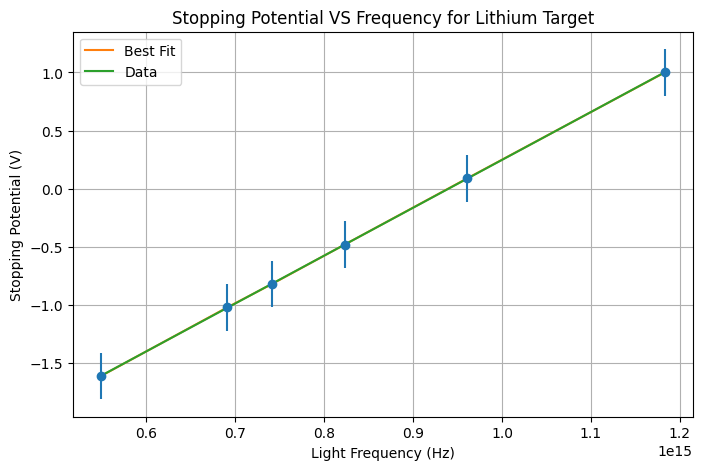

In [ ]:
plt.figure(figsize=(8, 5))

# TODO: Use plt.errorbar() to plot the data with yerr=0.2 and fmt='o' (for dots)
plt.errorbar(xLi,yLi,yerr=0.2,fmt='o')

# TODO: Generate y-values for the line using the optimal parameters (hNa, wNa)
line_y2 = linear_model(xLi, hLi, wLi)

# TODO: Plot the line_y on top of the scatter plot.
plt.plot(xLi,yLi)
plt.plot(xLi,line_y2)
# Challenge: Can you add the error value to the label? (e.g., label=f'Fit: k={k_opt:.2f} ± {k_err:.2f}')


# Formatting
plt.xlabel("Light Frequency (Hz)")
plt.ylabel("Stopping Potential (V)")
plt.title("Stopping Potential VS Frequency for Lithium Target")
plt.legend(['Best Fit', 'Data'])
plt.grid(True)